In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [32]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
file_path = '/content/drive/MyDrive/Fashion_Retail_Sales.csv'
df = pd.read_csv(file_path)
df.head(10)

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash
5,4080,Onesie,2914.0,2022-12-11,4.5,Credit Card
6,4055,Jacket,2571.0,2023-07-08,1.3,Cash
7,3973,Trousers,2419.0,2022-11-10,4.6,Cash
8,4044,Jeans,4771.0,2023-05-19,4.1,Cash
9,4010,Loafers,4233.0,2023-06-11,NaN,Credit Card


In [35]:
# Check Shape and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


In [36]:
# Check missing values
df.isnull().sum()

,0
Customer Reference ID,0
Item Purchased,0
Purchase Amount (USD),650
Date Purchase,0
Review Rating,324
Payment Method,0


In [37]:
# Descriptive statistics
df.describe(include='all')

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
count,3400.000000,3400,2750.000000,3400,3076.000000,3400
unique,NaN,50,NaN,365,NaN,2
top,NaN,Belt,NaN,2023-09-22,NaN,Credit Card
freq,NaN,90,NaN,17,NaN,1770
mean,4039.660588,NaN,156.709818,NaN,2.999057,NaN
std,48.122583,NaN,419.536669,NaN,1.156505,NaN
min,3957.000000,NaN,10.000000,NaN,1.000000,NaN
25%,3997.000000,NaN,57.000000,NaN,2.000000,NaN
50%,4040.000000,NaN,110.000000,NaN,3.000000,NaN
75%,4081.000000,NaN,155.750000,NaN,4.000000,NaN


In [38]:
# Convert Dates and Handle Data Types
# Convert Date Purchase to datetime
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'])

# Confirm the change
df.dtypes

,0
Customer Reference ID,int64
Item Purchased,object
Purchase Amount (USD),float64
Date Purchase,datetime64[ns]
Review Rating,float64
Payment Method,object


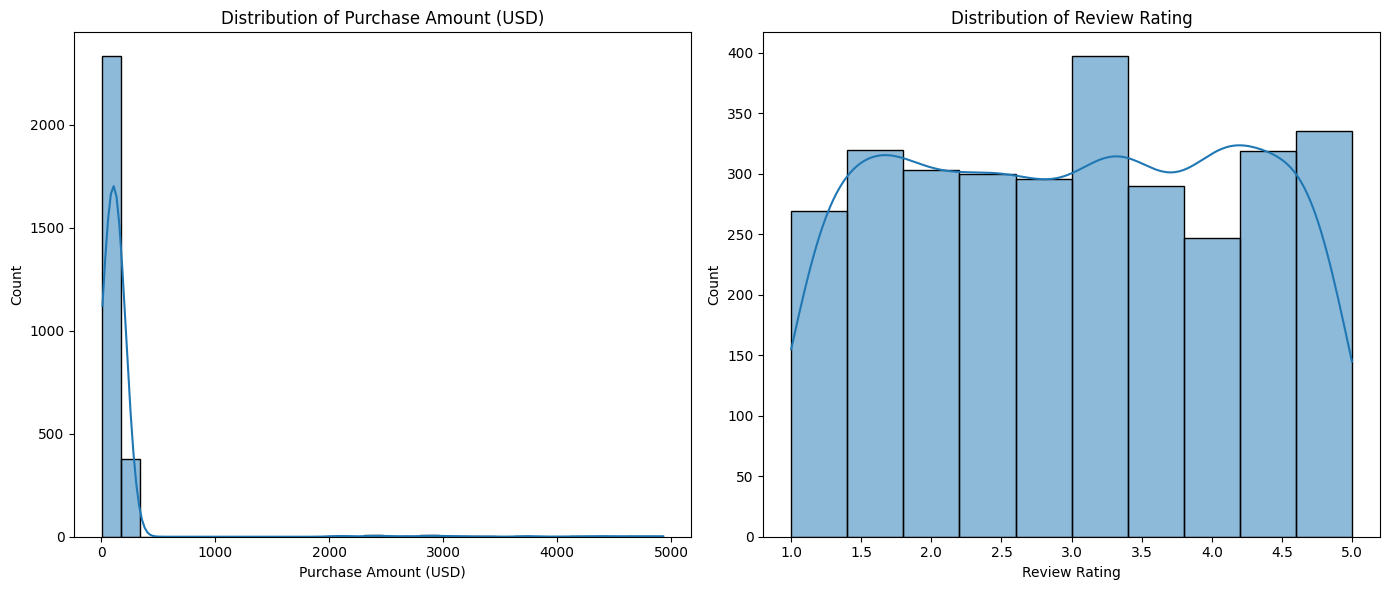

In [39]:
# Distribution Plots for Numerical Data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Purchase Amount (USD)'].dropna(), kde=True, bins=30)
plt.title("Distribution of Purchase Amount (USD)")

plt.subplot(1, 2, 2)
sns.histplot(df['Review Rating'].dropna(), kde=True, bins=10)
plt.title("Distribution of Review Rating")

plt.tight_layout()
plt.show()


Number of outliers using Z-score: 43


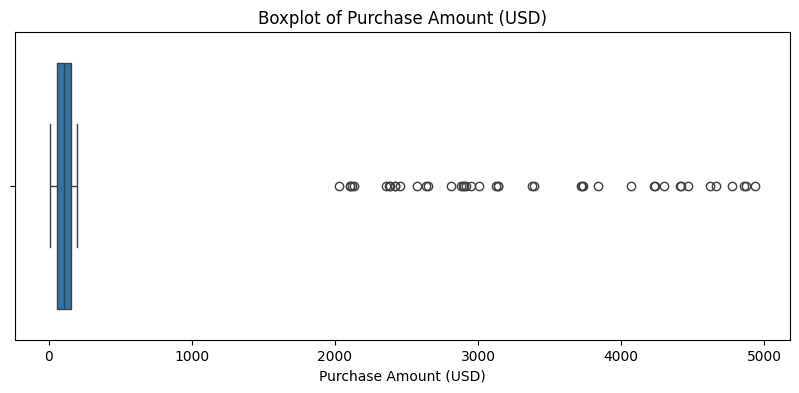

In [40]:
# Outlier Detection - Z-Score Method
# Drop NaNs for numeric column
df_z = df[['Purchase Amount (USD)']].dropna()

# Z-score
z_scores = zscore(df_z)
df_z['z_score'] = z_scores

# Outliers using Z > 3
outliers_z = df_z[np.abs(df_z['z_score']) > 3]
print(f"Number of outliers using Z-score: {len(outliers_z)}")

# Visualize
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Purchase Amount (USD)'])
plt.title("Boxplot of Purchase Amount (USD)")
plt.show()


In [41]:
# Outlier Detection - IQR Method
Q1 = df['Purchase Amount (USD)'].quantile(0.25)
Q3 = df['Purchase Amount (USD)'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers_iqr = df[(df['Purchase Amount (USD)'] < lower_bound) | (df['Purchase Amount (USD)'] > upper_bound)]
print(f"Number of outliers using IQR: {len(outliers_iqr)}")


Number of outliers using IQR: 43


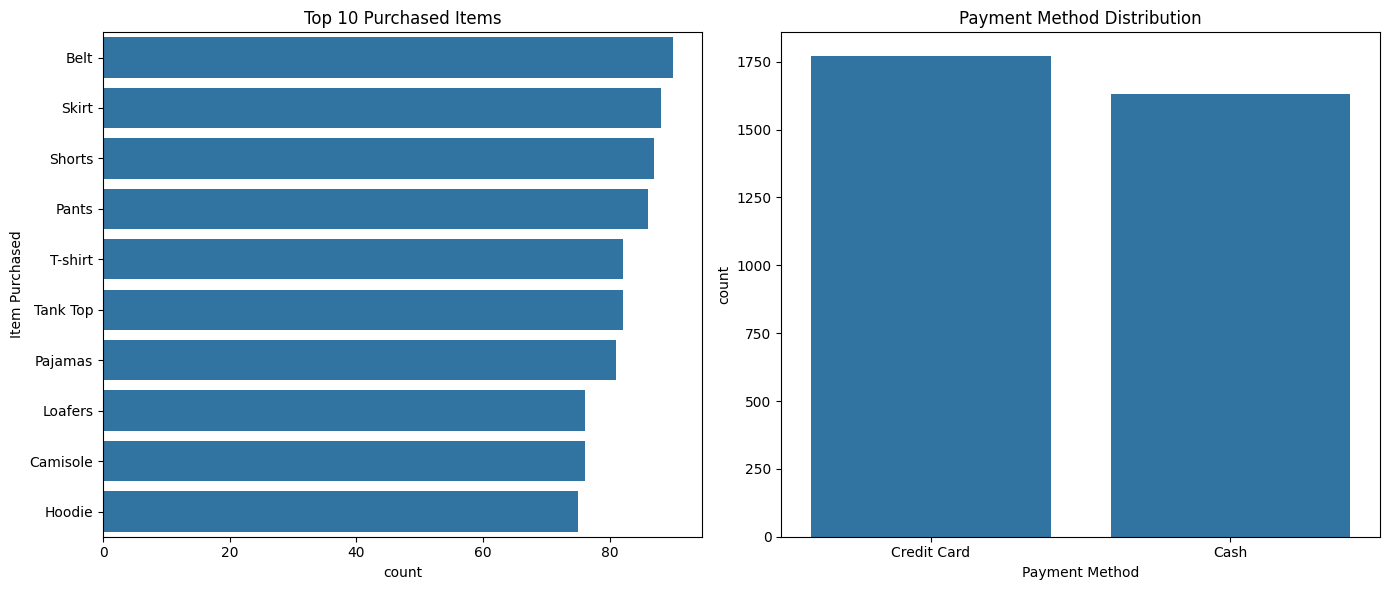

In [42]:
# Categorical Features Analysis
# Count plots for Item Purchased and Payment Method
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(y='Item Purchased', data=df, order=df['Item Purchased'].value_counts().index[:10])
plt.title("Top 10 Purchased Items")

plt.subplot(1, 2, 2)
sns.countplot(x='Payment Method', data=df)
plt.title("Payment Method Distribution")

plt.tight_layout()
plt.show()


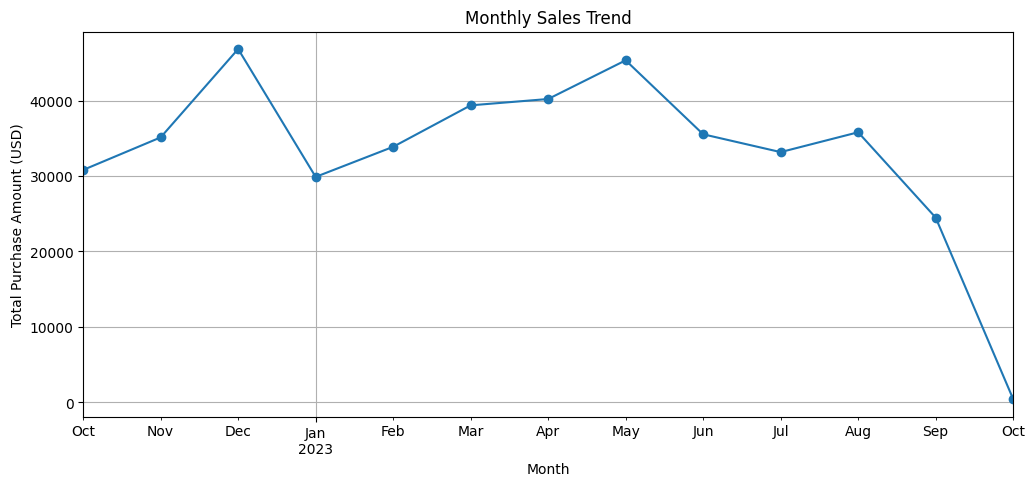

In [43]:
# Time Series Trend of Purchases
# Create a new column for month
df['Month'] = df['Date Purchase'].dt.to_period('M')

# Plot monthly trend
monthly_sales = df.groupby('Month')['Purchase Amount (USD)'].sum()

monthly_sales.plot(kind='line', figsize=(12, 5), marker='o', title='Monthly Sales Trend')
plt.ylabel('Total Purchase Amount (USD)')
plt.grid(True)
plt.show()


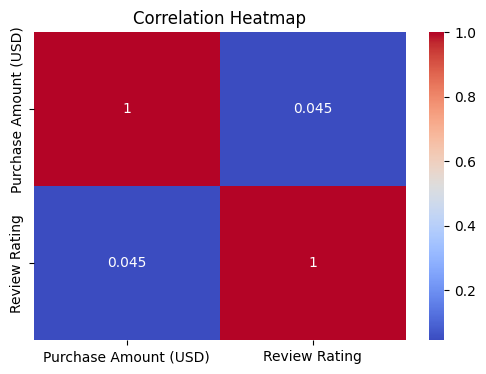

In [44]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Purchase Amount (USD)', 'Review Rating']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
